# Import Neccessary Libraries

In [ ]:
import pandas as pd
from tqdm import tqdm, tqdm_notebook
import numpy as np
import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [ ]:
tqdm.pandas()

In [ ]:
# this library can deal with word contractions like haven't --> have not
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
import contractions

In [ ]:
# To generate embeddings
! pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer, util
# It is bert sentence transformer model, which can capture semantic meaning and produces a fix length dense array
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# unzipping the data
!tar -xvzf "/content/drive/MyDrive/Sentiment and Topic Modelling/aclImdb_v1.tar.gz"

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [ ]:
positive_reviews_path = "/content/aclImdb/train/pos"
negative_reviews_path = "/content/aclImdb/train/neg"

In [ ]:
def load_reviews(path):
  reviews = []
  for filename in os.listdir(path):
    if filename.endswith(".txt"):
      with open(os.path.join(path, filename), "r", encoding = "utf-8") as f:
        reviews.append(f.read())
  return reviews

In [ ]:
positive_reviews = load_reviews(positive_reviews_path)
negative_reviews = load_reviews(negative_reviews_path)

In [ ]:
positive_labels = [1]*len(positive_reviews)
negative_labels = [0]*len(negative_reviews)

In [ ]:
reviews = positive_reviews + negative_reviews
labels = positive_labels + negative_labels

In [ ]:
df = pd.DataFrame({
    "review": reviews,
    "sentiment": labels
})

In [ ]:
df = df.sample(frac= 1).reset_index(drop = True)

In [ ]:
df.head()

,review,sentiment
0,The final installment in the action thriller f...,1
1,"Typical Troma-trash, this smutty 80's flick is...",0
2,Unless you are geeky film student who has to s...,0
3,"hi, im scott (A.K.A woody7739) i Love the film...",1
4,This movie is funny and suitable for any age. ...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
df.to_csv("/content/drive/MyDrive/Sentiment and Topic Modelling/imdb_review.csv", index = False)

In [ ]:
test_positive_reviews_path = "/content/aclImdb/test/pos"
test_negative_reviews_path = "/content/aclImdb/test/neg"

In [ ]:
def load_reviews(path):
  i = 0
  reviews = []
  for filename in os.listdir(path):
    if filename.endswith(".txt"):
      with open(os.path.join(path, filename), "r", encoding = "utf-8") as f:
        reviews.append(f.read())
    i = i + 1
    if i == 5000:
      break
  return reviews

In [ ]:
test_positive_reviews = load_reviews(test_positive_reviews_path)
test_negative_reviews = load_reviews(test_negative_reviews_path)

In [ ]:
test_positive_labels = [1]*len(test_positive_reviews)
test_negative_labels = [0]*len(test_negative_reviews)

In [ ]:
test_reviews = test_positive_reviews + test_negative_reviews
test_labels = test_positive_labels + test_negative_labels

In [ ]:
test_df = pd.DataFrame({
    "review": test_reviews,
    "sentiment": test_labels
})

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Sentiment and Topic Modelling/imdb_review.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def clean_text(text):
  text = BeautifulSoup(text, "html.parser").get_text()

  text = contractions.fix(text)

  text = re.sub(r'[^a-zA-Z\s]', '', text)

  text = text.lower()

  text = re.sub(r"\s+", " ", text)

  return text

In [ ]:
clean_text(df["review"].sample().iloc[0])

'lame cliched superhero action movie drivel i had high hopes for this movie and the genre of hk buddy cop actioneers is one that i do not despise but very rarely do i see a storyline as trite and ludicrous as this one was this would have been forgivable as it always is in these kinds of movies when the action compensates unfortunately it did not the action does carry the trademark surreality and over the top nature of hk action but it is not very involving obscenely gory and in fact often completely incoherent perhaps this is due to reediting for american release it does show signs in many places of patchwork i was very disappointed'

In [ ]:
df["cleaned_review"] = df["review"].apply(clean_text)

<ipython-input-63-f7d29828217b>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [ ]:
df["cleaned_review"]

,cleaned_review
0,the final installment in the action thriller f...
1,typical tromatrash this smutty s flick is cons...
2,unless you are geeky film student who has to s...
3,hi i am scott aka woody i love the film twiste...
4,this movie is funny and suitable for any age i...
...,...
24995,spirit is a unique and original look at wester...
24996,dreck about three beautiful women in californi...
24997,this is one of those movies where i wish i had...
24998,there i was sitting alone in my flat on a satu...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          25000 non-null  object
 1   sentiment       25000 non-null  int64 
 2   cleaned_review  25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
def remove_stop_words(text):
  words = word_tokenize(text)
  filtered_words = [word for word in words if word not in stop_words]
  return " ".join(filtered_words)

In [ ]:
df["cleaned_review"] = df["cleaned_review"].apply(remove_stop_words)

In [ ]:
df["cleaned_review"].head()

,cleaned_review
0,final installment action thriller franchise pr...
1,typical tromatrash smutty flick considered one...
2,unless geeky film student see everything film ...
3,hi scott aka woody love film twisted desire lo...
4,movie funny suitable age definitely familytype...


In [ ]:
df['tokenized_review'] = df['cleaned_review'].apply(word_tokenize)

In [ ]:
df["tokenized_review"].head()

,tokenized_review
0,"[final, installment, action, thriller, franchi..."
1,"[typical, tromatrash, smutty, flick, considere..."
2,"[unless, geeky, film, student, see, everything..."
3,"[hi, scott, aka, woody, love, film, twisted, d..."
4,"[movie, funny, suitable, age, definitely, fami..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review            25000 non-null  object
 1   sentiment         25000 non-null  int64 
 2   cleaned_review    25000 non-null  object
 3   tokenized_review  25000 non-null  object
dtypes: int64(1), object(3)
memory usage: 781.4+ KB


In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize_text(text):
  lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
  return " ".join(lemmatized_words)

In [ ]:
df["preprocessed_review"] = df["tokenized_review"].apply(lemmatize_text)

In [ ]:
df.head()

,review,sentiment,cleaned_review,tokenized_review,preprocessed_review
0,The final installment in the action thriller f...,1,final installment action thriller franchise pr...,"[final, installment, action, thriller, franchi...",final installment action thriller franchise pr...
1,"Typical Troma-trash, this smutty 80's flick is...",0,typical tromatrash smutty flick considered one...,"[typical, tromatrash, smutty, flick, considere...",typical tromatrash smutty flick considered one...
2,Unless you are geeky film student who has to s...,0,unless geeky film student see everything film ...,"[unless, geeky, film, student, see, everything...",unless geeky film student see everything film ...
3,"hi, im scott (A.K.A woody7739) i Love the film...",1,hi scott aka woody love film twisted desire lo...,"[hi, scott, aka, woody, love, film, twisted, d...",hi scott aka woody love film twisted desire lo...
4,This movie is funny and suitable for any age. ...,1,movie funny suitable age definitely familytype...,"[movie, funny, suitable, age, definitely, fami...",movie funny suitable age definitely familytype...


In [ ]:
final_df = df[["preprocessed_review", "sentiment"]]

In [ ]:
final_df.head()

,preprocessed_review,sentiment
0,final installment action thriller franchise pr...,1
1,typical tromatrash smutty flick considered one...,0
2,unless geeky film student see everything film ...,0
3,hi scott aka woody love film twisted desire lo...,1
4,movie funny suitable age definitely familytype...,1


In [ ]:
# In case the progress is lost, i have saved it into my drive
final_df.to_csv("/content/drive/MyDrive/Sentiment and Topic Modelling/final_df.csv", index = False)

In [ ]:
final_df = pd.read_csv("/content/drive/MyDrive/Sentiment and Topic Modelling/final_df.csv")

In [ ]:
final_df.head()

,preprocessed_review,sentiment
0,final installment action thriller franchise pr...,1
1,typical tromatrash smutty flick considered one...,0
2,unless geeky film student see everything film ...,0
3,hi scott aka woody love film twisted desire lo...,1
4,movie funny suitable age definitely familytype...,1


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   preprocessed_review  25000 non-null  object
 1   sentiment            25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
text = " ".join(df["preprocessed_review"])

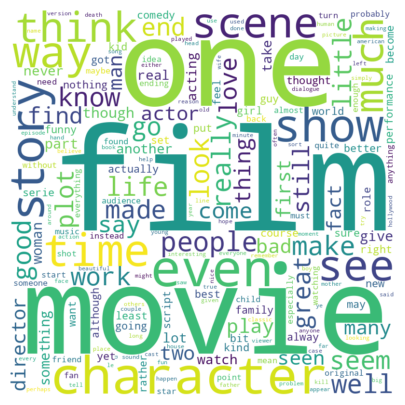

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color = "white").generate(text)
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
text_neg = " ".join((df[df["sentiment"] == 0])["preprocessed_review"])

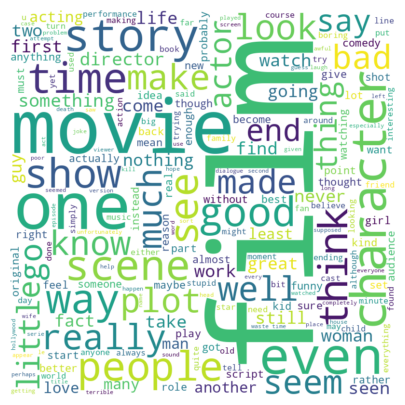

In [ ]:
wordcloud_neg = WordCloud(width = 800, height = 800, background_color = "white").generate(text_neg)
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud_neg, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
text_pos = " ".join((df[df["sentiment"] == 1])["preprocessed_review"])

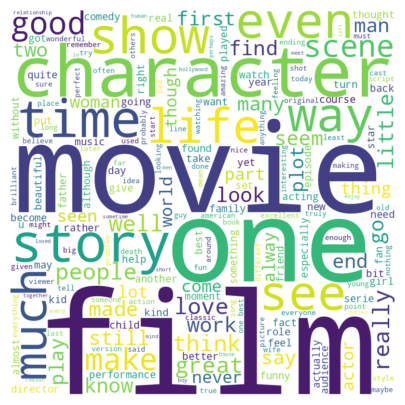

In [ ]:
wordcloud_pos = WordCloud(width = 800, height = 800, background_color = "white").generate(text_pos)
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud_pos, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
final_df["preprocessed_review"].apply(word_tokenize)

,preprocessed_review
0,"[final, installment, action, thriller, franchi..."
1,"[typical, tromatrash, smutty, flick, considere..."
2,"[unless, geeky, film, student, see, everything..."
3,"[hi, scott, aka, woody, love, film, twisted, d..."
4,"[movie, funny, suitable, age, definitely, fami..."
...,...
24995,"[spirit, unique, original, look, western, life..."
24996,"[dreck, three, beautiful, woman, california, g..."
24997,"[one, movie, wish, stayed, barthe, film, quite..."
24998,"[sitting, alone, flat, saturday, night, choice..."


In [ ]:
final_df['vectors_pretrained_bert'] = final_df["preprocessed_review"].progress_apply(model.encode)

100%|██████████| 25000/25000 [39:32<00:00, 10.54it/s]


In [ ]:
np.save("/content/drive/MyDrive/Sentiment and Topic Modelling/embeddings.npy", final_df['vectors_pretrained_bert'].values)

In [ ]:
X = np.vstack(final_df["vectors_pretrained_bert"].values)
y = final_df["sentiment"]

In [47]:
# Here i saved the vectorized embeddings, because it takes too much time to generate these embeddings
np.save("/content/drive/MyDrive/Sentiment and Topic Modelling/X_train.npy", X)
np.save("/content/drive/MyDrive/Sentiment and Topic Modelling/y_train.npy", y)

In [46]:
X = np.load("/content/drive/MyDrive/Sentiment and Topic Modelling/X_train.npy")
y = np.load("/content/drive/MyDrive/Sentiment and Topic Modelling/y_train.npy")

In [ ]:
X.shape

(25000, 384)

In [ ]:
y.shape

(25000,)

In [ ]:
pipelines = {
    "bnb": Pipeline([
        ('classifier', BernoulliNB())
    ]),

    # "mnb": Pipeline([
    #     ('classifier', MultinomialNB())
    # ]),

    "gnb": Pipeline([
        ('classifier', GaussianNB())
    ]),

    "logistic_regression": Pipeline([
        ('classifier', LogisticRegression(max_iter = 1000))
    ]),

    "svc": Pipeline([
        ('classifier', SVC())
    ]),

    "random_forest": Pipeline([
        ('classifier', RandomForestClassifier())
    ]),

    "extra_trees": Pipeline([
        ('classifier', ExtraTreesClassifier())
    ]),

    "gradient_boosting": Pipeline([
        ('classifier', GradientBoostingClassifier())
    ]),

    "xgboost": Pipeline([
        ('classifier', XGBClassifier())
    ])


}

In [ ]:
kf = KFold(n_splits = 2, shuffle = True, random_state = 42)

In [ ]:
results = {}
for name, pipeline in tqdm(pipelines.items()):
  scores = cross_val_score(pipeline, X, y, cv = kf, scoring = "accuracy")
  results[name] = {
      'scores': scores,
      'mean': scores.mean(),
      'std': scores.std()
  }

for name, result in results.items():
  print(f"Model: {name}")
  print(f"Scores: {result['scores']}")
  print(f"Mean Score: {result['mean']:.4f}")
  print(f"Standard Deviation: {result['std']:.4f}")
  print()

100%|██████████| 8/8 [46:45<00:00, 350.67s/it]

Model: bnb
Scores: [0.7508 0.7672 0.7596 0.7668 0.7496]


KeyError: 'mean_score'

In [ ]:
for name, result in results.items():
  print(f"Model: {name}")
  print(f"Scores: {result['scores']}")
  print(f"Mean Score: {result['mean']:.4f}")
  print(f"Standard Deviation: {result['std']:.4f}")
  print()

Model: bnb
Scores: [0.7508 0.7672 0.7596 0.7668 0.7496]
Mean Score: 0.7588
Standard Deviation: 0.0075

Model: gnb
Scores: [0.7578 0.7636 0.7606 0.7686 0.7592]
Mean Score: 0.7620
Standard Deviation: 0.0038

Model: logistic_regression
Scores: [0.818  0.824  0.8238 0.8176 0.826 ]
Mean Score: 0.8219
Standard Deviation: 0.0034

Model: svc
Scores: [0.836  0.8396 0.8376 0.8376 0.8436]
Mean Score: 0.8389
Standard Deviation: 0.0026

Model: random_forest
Scores: [0.7822 0.7864 0.7772 0.7854 0.7798]
Mean Score: 0.7822
Standard Deviation: 0.0034

Model: extra_trees
Scores: [0.7854 0.7874 0.786  0.7862 0.778 ]
Mean Score: 0.7846
Standard Deviation: 0.0034

Model: gradient_boosting
Scores: [0.7902 0.7928 0.7836 0.7818 0.7796]
Mean Score: 0.7856
Standard Deviation: 0.0050

Model: xgboost
Scores: [0.799  0.801  0.8022 0.7946 0.7972]
Mean Score: 0.7988
Standard Deviation: 0.0027



As we can see that models like Logistic Regression and SVC are performing well, im going with SVC, as it can reduce the variance much.
Before choosing between these two, let's compare them with some hyperparameter tuning

In [ ]:
pipelines = {
    "logistic_regression": Pipeline([
        ('classifier', LogisticRegression(max_iter = 1000, C = 0.1, solver = "sag"))
    ]),

    "svc": Pipeline([
        ('classifier', SVC(C = 0.1))
    ]),



}

In [ ]:
results = {}
for name, pipeline in tqdm(pipelines.items()):
  scores = cross_val_score(pipeline, X, y, cv = kf, scoring = "accuracy")
  results[name] = {
      'scores': scores,
      'mean': scores.mean(),
      'std': scores.std()
  }

for name, result in results.items():
  print()
  print(f"Model: {name}")
  print(f"Scores: {result['scores']}")
  print(f"Mean Score: {result['mean']:.4f}")
  print(f"Standard Deviation: {result['std']:.4f}")

100%|██████████| 2/2 [03:43<00:00, 111.62s/it]


Model: logistic_regression
Scores: [0.80584 0.8052 ]
Mean Score: 0.8055
Standard Deviation: 0.0003

Model: svc
Scores: [0.81168 0.81096]
Mean Score: 0.8113
Standard Deviation: 0.0004


In [ ]:
kf = KFold(n_splits = 3, shuffle = True, random_state = 42)

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear', C=0.001, tol=1e-1, max_iter=10000))
])

In [ ]:
scores = cross_val_score(pipe, X[:5000], y[:5000], cv = kf, scoring = "accuracy")
print("mean:", scores.mean())
print("std:", scores.std())

mean: 0.8026017845650557
std: 0.009871441049617905


In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])

In [ ]:
scores = cross_val_score(pipe, X[:5000], y[:5000], cv = kf, scoring = "accuracy")
print("mean:", scores.mean())
print("std:", scores.std())

mean: 0.8066026650612255
std: 0.011236854372610829


In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear', C=0.01))
])

scores = cross_val_score(pipe, X, y, cv = kf, scoring = "accuracy")
print("mean:", scores.mean())
print("std:", scores.std())

After checking for many hyperparameter combinations, i'm going with these hyperparameters of SVC

In [ ]:
test_df = test_df.sample(frac = 1).reset_index(drop = True)

In [ ]:
test_df["preprocessed_review"] = test_df["review"].apply(clean_text)
test_df["preprocessed_review"] = test_df["preprocessed_review"].apply(remove_stop_words)
test_df["preprocessed_review"] = test_df["preprocessed_review"].apply(word_tokenize)
test_df["preprocessed_review"] = test_df["preprocessed_review"].apply(lemmatize_text)
test_df['vectors_pretrained_bert'] = test_df["preprocessed_review"].progress_apply(model.encode)

<ipython-input-19-f7d29828217b>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
100%|██████████| 10000/10000 [15:34<00:00, 10.70it/s]


In [ ]:
X_test = np.vstack(test_df["vectors_pretrained_bert"].values)
y_test = test_df["sentiment"]

In [ ]:
svc = SVC(kernel='linear', C=0.01)
svc.fit(X, y)
print(classification_report(y_pred = svc.predict(X_test), y_true = y_test))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      5000
           1       0.78      0.82      0.80      5000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



Looks like we have decent results, with less variance